In [61]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import scipy.special as sp
import matplotlib.pyplot as plt

In [62]:
df1 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 1")
df2 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 2")

# ÚLOHA 1 – Bayesovské odhady
Náš expertní odhad je, že by za každých 5 ms (5 časových intervalů) mělo nastat 10 připojení (celkově 10 výskytů události). Apriorní konjugované rozdělení tedy bude odpovídat
Gamma rozdělení s parametry $\alpha=10$ a $\beta=5$.

<!--
Máme náhodnou veličinu s Poissonovým rozdělením a expertní odhad, že každých 5 ms by mělo nastat 10 připojení. Expertní odhad můžeme reformulovat na znění, že průměrná doba mezi dvěma připojeními je 0.5 ms. Pak tento odhad odpovídá exponenciálnímu rozdělení s parametrem $\lambda = 2$. Dle Wikipedia je pro Poissonovo rozdělení vhodným konjugovaným apriorním rozdělením Gamma rozdělení. Hustota pravděpodobnosti (pdf) Gamma rozdělení je dána vztahem:
$$
pdf(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x}
$$
a vztah pto hustotu pravděpodobnosti expertního odhadu je následující:
$$
pdf(x) = \lambda e^{-\lambda x}.
$$
Pro parametry $\alpha$ a $\beta$ bude zřejmě platit následující, abychom mohli použít Gamma rozdělení jako konjugované apriorní rozdělení:
* $x^{\alpha - 1} = 1$, tzn., $\alpha - 1 = 0$ a tím pádem $\alpha = 1$
* $e^{-\beta x} = e^{-\lambda x}$, čili $\beta = \lambda$
* zbylé hodnoty jsou pouze multiplikativní konstanty, které nemají na polohu maxima vliv.

Správnost volby konjugovaného apriorního rozdělení pak ověříme graficky.
>

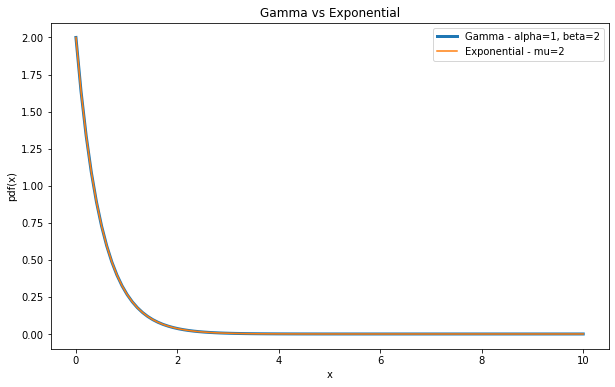

In [100]:
mu = 2
alpha_apriori = 1
beta_apriori = mu
plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 100)
y_aposteriori = st.gamma.pdf(x, alpha_apriori, 0, 1/beta_apriori)
y_apriori = st.expon.pdf(x, 0, 1/mu)
plt.title("Gamma vs Exponential")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.plot(x, y_aposteriori, label=f"Gamma - alpha={alpha_apriori}, beta={beta_apriori}", linewidth=3)
plt.plot(x, y_apriori, label=f"Exponential - mu={mu}")
plt.legend()
plt.show()

### Apriorní a aposteriorní hustota parametru Poissonova rozdělení $\lambda$
Apriorní hustotu získáme viz výše a aposteriorní hustota je hustota Gamma rozdělení s parametry $\alpha=1 + \sum^{n}_{i=1} x_i$ a $\beta=2+n$

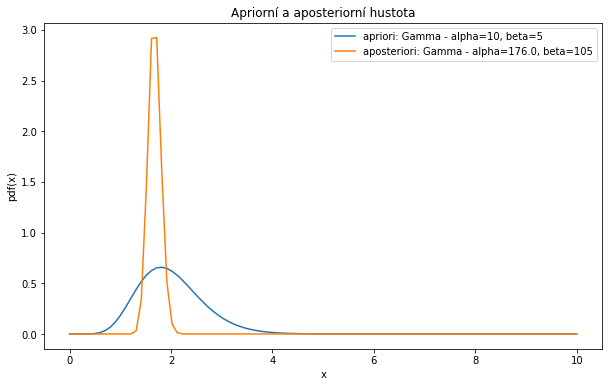

In [130]:
mu_apriori = 2
alpha_apriori = 10
beta_apriori = 5
plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 100)
y_apriori = st.gamma.pdf(x, alpha_apriori, 0, 1/beta_apriori)
observations = np.array(df1["uloha_1 a)"].dropna().values)
alpha_aposteriori = alpha_apriori + observations.sum()
beta_aposteriori = beta_apriori + observations.shape[0]
y_aposteriori = st.gamma.pdf(x, alpha_aposteriori, 0, 1/beta_aposteriori)
plt.title("Apriorní a aposteriorní hustota")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.plot(x, y_apriori, label=f"apriori: Gamma - alpha={alpha_apriori}, beta={beta_apriori}")
plt.plot(x, y_aposteriori, label=f"aposteriori: Gamma - alpha={alpha_aposteriori}, beta={beta_aposteriori}")
plt.legend()
plt.show()

### Apriorní a aposteriorní prediktivní hustota pozorovaní
Apriorní i aposteriorní prediktivní hustota vychází z negativního binomického rozdělení a je dána vztahem:
$$
pmf(k) = \binom{k+r-1}{k}(1-p)^kp^r.
$$
Pro apriorní hustotu jsou parametry dány jako $r=\alpha$ a $p=\frac{\beta}{\beta+1}$, pro aposteriorní hustotu jsou parametry pak následující $r=\alpha + \sum^{n}_{i=1} x_i$ a $p=\frac{\beta+n}{\beta+n+1}$

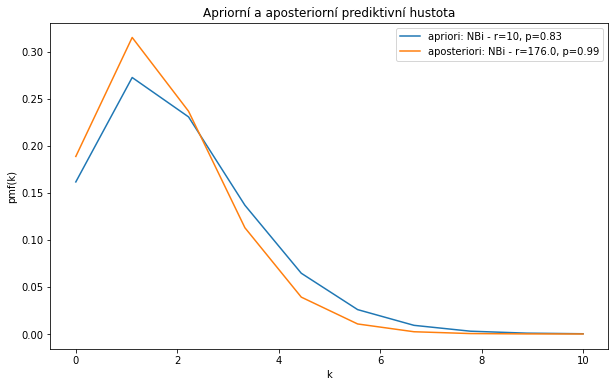

In [127]:
alpha_apriori = 10
beta_apriori = 5
plt.figure(figsize=(10, 6))
k = np.linspace(0, 10, 10)
y_apriori = st.nbinom.pmf(k, alpha_apriori, beta_apriori/(beta_apriori+1))
observations = np.array(df1["uloha_1 a)"].dropna().values)
alpha_aposteriori = alpha_apriori + observations.sum()
beta_aposteriori = beta_apriori + observations.shape[0]
y_aposteriori = st.nbinom.pmf(k, alpha_aposteriori, beta_aposteriori/(beta_aposteriori+1))
plt.title("Apriorní a aposteriorní prediktivní hustota")
plt.xlabel("k")
plt.ylabel("pmf(k)")
plt.plot(k, y_apriori, label=f"apriori: NBi - r={alpha_apriori}, p={round(beta_apriori/(beta_apriori+1), 2)}")
plt.plot(k, y_aposteriori, label=f"aposteriori: NBi - r={alpha_aposteriori}, p={round(beta_aposteriori/(beta_aposteriori+1), 2)}")
plt.legend()
plt.show()

### Porovnání intervalů spolehlivosti odhadu $\lambda$ z apriorního a aposteriorního rozdělení
Bodový odhad parametru $\lambda$ je dán střední hodnotou Gamma rozdělení s odpovídajícími parametry. 95% interval spolehlivosti odhadu parametru $\lambda$ tak bude dán 
intervalem ohraničeným 2,5 a  97,5 percentily Gamma rozdělení s odpovídajícími parametry.
<!--
Interval spolehlivosti odhadu parametru $\lambda$ je roven $(\hat{\lambda}g_{1-\alpha/2}, \hat{\lambda}g_{\alpha/2})$, kde:
* $\hat{\lambda}$ je bodový odhad parametru $\lambda$,
* $1 - \alpha$ je hladina významnosti,
* $g_{k}$ je $k$-tý percentil Gamma rozdělení.

Apriorního i aposteriorní rozdělení se řídí Gamma rozdělením, tzn., bodové odhady jejich parametrů $\lambda$ jsou dány následovně:
$$
\hat{\lambda} = \frac{\alpha + \sum^{n}_{i=1} x_i}{\beta + n}.
$$
!>

In [132]:
alpha_apriori = 10
beta_apriori = 5
g_0025_apriori = st.gamma.ppf(0.025, alpha_apriori, 0, 1/beta_apriori)
g_0975_apriori = st.gamma.ppf(0.975, alpha_apriori, 0, 1/beta_apriori)
lambda_confidence_interval_apriori = (g_0025_apriori, g_0975_apriori)

observations = np.array(df1["uloha_1 a)"].dropna().values)
alpha_aposteriori = alpha_apriori + observations.sum()
beta_aposteriori = beta_apriori + observations.shape[0]
g_0025_aposteriori = st.gamma.ppf(0.025, alpha_aposteriori, 0, 1/beta_aposteriori)
g_0975_aposteriori = st.gamma.ppf(0.975, alpha_aposteriori, 0, 1/beta_aposteriori)
lambda_confidence_interval_aposteriori = (g_0025_aposteriori, g_0975_aposteriori)

print(f"Apriorní 95% interval spolehlivosti: {lambda_confidence_interval_apriori}")
print(f"Aposteriorní 95% interval spolehlivosti: {lambda_confidence_interval_aposteriori}")

Apriorní 95% interval spolehlivosti: (0.9590777392264868, 3.416960690283833)
Aposteriorní 95% interval spolehlivosti: (1.4376938284869922, 1.9327207471868797)


Z výsledků lze pozorovat, že aposteriorní 95% interval spolehlivosti má menší rozsah než apriorní 95% interval spolehlivosti. Tzn., že na základě pozorování jsme schopni se stejnou spolehlivostí poměrně významně zpřesnit odhad parametru $\lambda$.